<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#With-Textblob" data-toc-modified-id="With-Textblob-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>With Textblob</a></span></li><li><span><a href="#With-Vader" data-toc-modified-id="With-Vader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>With Vader</a></span></li></ul></div>

In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

## Load data

In [2]:
train = pd.read_csv("../data/train_cleaned.csv")

In [3]:
TOPICS = train['class'].unique().tolist()

## With Textblob

In [4]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [5]:
train['polarity_score'] = train['Title'].apply(lambda x : polarity(x))
train['sentiment'] = train['polarity_score'].map(lambda x: sentiment(x))

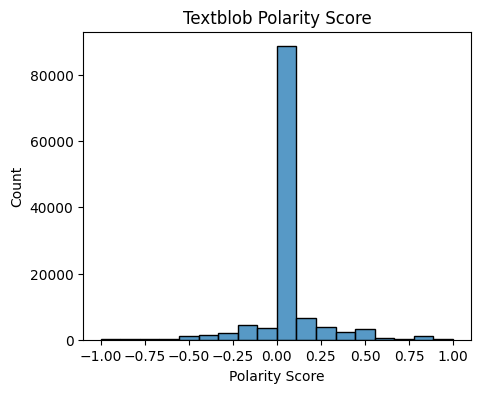

In [6]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(train['polarity_score'])
plt.title('Textblob Polarity Score')
plt.xlabel('Polarity Score')
plt.show()

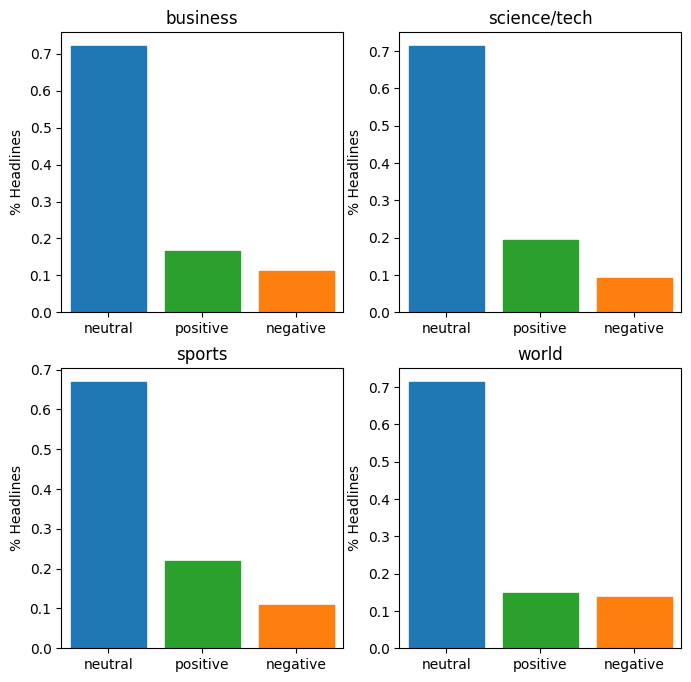

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

colors = [sns.color_palette()[i] for i in [0, 2, 1]]

for i, topic in enumerate(TOPICS):
    
    y_ind = i % 2
    x_ind = ceil((i+1)/2) - 1
    
    sentiment_counts = train[train['class'] == topic]['sentiment'].value_counts(normalize=True)
    
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts, ax=ax[x_ind, y_ind])

    for j, bar in enumerate(ax[x_ind, y_ind].patches):
        bar.set_color(colors[j])    

    ax[x_ind, y_ind].set_title(topic)
    ax[x_ind, y_ind].set_ylabel('% Headlines')

Sports and Science/Tech have relatively more positive than negative headlines, whereas Business and World headlines have a more even split.

Let's take a look at the most extreme headlines for each topic

In [8]:
for i, topic in enumerate(TOPICS):
    
    print(f"TOPIC:{topic}")
    
    neg_headlines = train[train['class'] == topic].sort_values('polarity_score').head()
    pos_headlines = train[train['class'] == topic].sort_values('polarity_score').tail()
    
    print("Positive Headlines")
    for _, headline, score in pos_headlines[['Title', 'polarity_score']].itertuples():
        print(score, "-", headline)
    
    print("Negative Headlines")
    for _, headline, score in neg_headlines[['Title', 'polarity_score']].itertuples():
        print(score, "-", headline)

TOPIC:business
Positive Headlines
1.0 - Best Buy reports third-quarter earnings rise 21 percent
1.0 - The perfect shop for children who like to toy with money
1.0 - The Best Way to Grow
1.0 - Best Buy adds Verizon to wireless line-up
1.0 - CapitalSource's Especially Warm Reception
Negative Headlines
-1.0 - House market has worst month since 2000
-1.0 - Rivals hope for the worst
-1.0 - Waiting for the Worst
-1.0 - Financier was grim reaper: Market-timing crime profited after 9/11
-1.0 - OECD 2005 forecasts bleak as oil rises and US deficit widens
TOPIC:science/tech
Positive Headlines
1.0 - Antarctic declared perfect place for astronomy!:
1.0 - Best Buy hit with lawsuit over layoffs of IT workers
1.0 - Fellow users are the best support
1.0 - Google sued by Perfect 10
1.0 - Earth's Best View of the Stars is in Antarctica
Negative Headlines
-1.0 - DOOM 3: Resurrection Of Evil Ann
-1.0 - Should Google blame Foot in Mouth disease, or Evil Bankers?
-1.0 - Resident Evil 4 breaks out
-1.0 - Cap

## With Vader

In [9]:
sid = SentimentIntensityAnalyzer()

def get_vader_score(text):
    
    scores = sid.polarity_scores(text)
    # returns a dict with the format
    # {'neg': 0.595, 'neu': 0.405, 'pos': 0.0, 'compound': -0.8689}
    # just return label with highest score and compound score
    score = scores['compound']
    scores.pop("compound")
    label = max(scores, key=scores.get)
    
    return (label, score)

In [10]:
train['polarity_score_vader'] = train['Title'].map(lambda x: get_vader_score(x)[1])
train['sentiment_vader'] = train['Title'].map(lambda x: get_vader_score(x)[0])

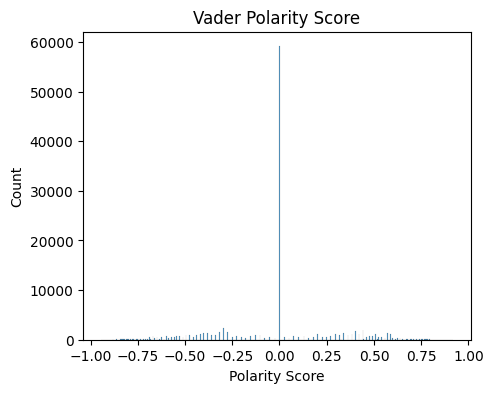

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(train['polarity_score_vader'])
plt.title('Vader Polarity Score')
plt.xlabel('Polarity Score')
plt.show()

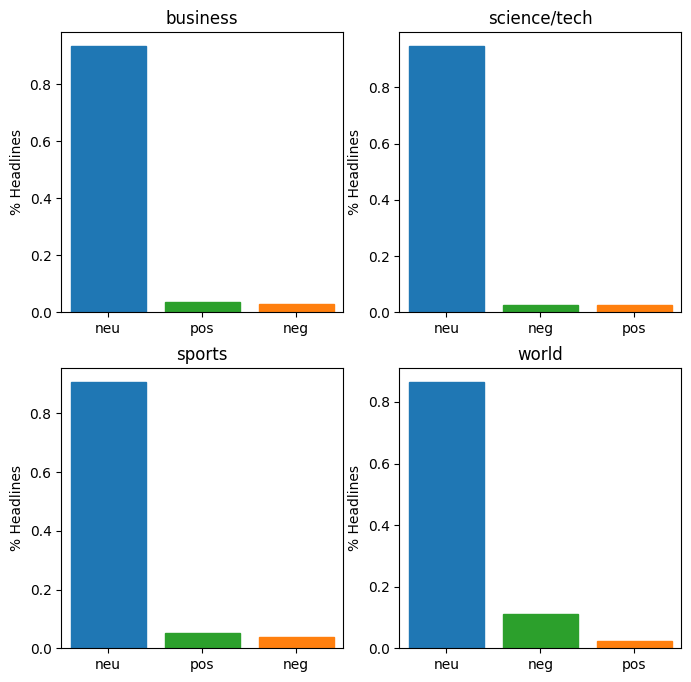

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

colors = [sns.color_palette()[i] for i in [0, 2, 1]]

for i, topic in enumerate(TOPICS):
    
    y_ind = i % 2
    x_ind = ceil((i+1)/2) - 1
    
    sentiment_counts = train[train['class'] == topic]['sentiment_vader'].value_counts(normalize=True)
    
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts, ax=ax[x_ind, y_ind])

    for j, bar in enumerate(ax[x_ind, y_ind].patches):
        bar.set_color(colors[j])    

    ax[x_ind, y_ind].set_title(topic)
    ax[x_ind, y_ind].set_ylabel('% Headlines')

Majority of headlines get categorised as neutral with Vader. Negative headlines for World articles are the category that stands out!